<p><a href="https://colab.research.google.com/github/ifmg-betim/2023.2_AUT.040_ProcSin/blob/main/Ex/Ex07_FiltrosDigitais_SEU_NOME.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

## ANÁLISE E APLICAÇÃO DE FILTROS EM SINAIS DE ECG

# TRABALHO FINAL - `[LUCAS HENRIQUE DOS ANJOS OLIVEIRA] (0034868) [MARIANA GOMES BRANDÃO VIDOTTI (00*****)]`




## Registre o seu RA

Primeiro, registre o seu RA na variável indicada.


<mark>**Fazer:** Escreva o seu RA na variável `RA`.</mark>

In [1]:
### SEU CÓDIGO COMEÇA AQUI ###
RA = 34868
### FIM DO CÓDIGO ###
print(RA)

34868


**Saída esperada**:
1. Seu número de RA
---

## O problema

Nesta atividade, você vai projetar e implementar filtros digitais FIR e IIR. Os filtros projetados serão usados em sinais de áudio (são os mesmo arquivos usados no Ex02).

<mark> **Faça**</mark>: execute o código abaixo para carregar os áudios.

In [2]:
# Importa bibliotecas
import numpy as np, scipy as sp, matplotlib.pyplot as plt, IPython.display as ipd
from scipy.io import wavfile
from scipy import signal
import requests

# Som do diapasão
response = requests.get('https://github.com/ifmg-betim/2023.2_AUT.040_ProcSin/blob/main/Ex/Ex02_diapasao.wav?raw=true')
open("diapasao.wav", "wb").write(response.content)
fs, diapasao = wavfile.read('diapasao.wav')
diapasao = diapasao[:90000] # sinal do diapasão
diapasao_i = (diapasao-np.mean(diapasao))/np.std(diapasao)

response = requests.get('https://github.com/ifmg-betim/2023.2_AUT.040_ProcSin/blob/main/Ex/Ex02_flauta.wav?raw=true')
open("flauta.wav", "wb").write(response.content)
fs, flauta = wavfile.read('flauta.wav')
flauta = flauta[:90000] # sinal da flauta
flauta_i = (flauta-np.mean(flauta))/np.std(flauta)

response = requests.get('https://github.com/ifmg-betim/2023.2_AUT.040_ProcSin/blob/main/Ex/Ex02_cello.wav?raw=true')
open("cello.wav", "wb").write(response.content)
fs, cello = wavfile.read('cello.wav')
cello = cello[10000:100000,0] # sinal do violoncelo
cello_i = (cello-np.mean(cello))/np.std(cello)

# vetor tempo
tempo = np.arange(len(diapasao))/fs # variável TEMPO (em segundos)
N = len(tempo) #tamanho do sinal
n = np.arange(N) #vetor de amostras
np.random.seed(RA+2023)
r = np.dot(np.random.uniform(.01, .3, 200), np.sin(np.random.uniform(4e3, fs/2,200).reshape((200,1))
                                          *2*np.pi*tempo+np.random.uniform(0, np.pi, (200,1))) )
diapasao = diapasao_i + r
flauta = flauta_i + r
cello = cello_i + r

## Sinais a serem analisado

O código acima criou as variáveis abaixo para serem usadas:
- `tempo`: vetor tempo apresentado na unidade "segundos", com frequência de amostragem de $f_s=44100$ Hz. Este vetor de tempo pode ser usado para os três sinais descritos abaixo.
- `diapasao`: vetor com amplitude do sinal de áudio do diapasão.
- `flauta`: vetor com amplitude do sinal de áudio da flauta.
- `violoncelo`: vetor com amplitude do sinal de áudio do violoncelo.

O código abaixo já implementa cada um dos sinais no domínio do tempo e um player para execução do áudio. Falta fazer a análise dos sinais no domínio da frequência.

<mark> **Faça**</mark>: plote a FFT dos sinais abaixo, adicionando código nos espaços indicados. Cole na primeira célula a função criada para calcular a FFT do sinal.

In [3]:
### SEU CÓDIGO COMEÇA AQUI ### (função que implementa a FFT)

# Função FFT
from scipy.fft import fft

def serieFourier(x, t, Hz=False, dB=False, deg=False, Nfft=None):

    N = len(x)
    T = t[1] - t[0] 

    if Nfft == None:
      Nfft = N

    X_f = fft(x, n=Nfft)
    X_f = X_f/N 
    X_f = X_f[:Nfft//2]
    X_f[1:] = 2*X_f[1:]
    if Hz == True:
      f0 = 1/(Nfft*T) 
      f = np.arange(Nfft)*f0 
      f = f[:Nfft//2]
    else:
      w0 = 2*np.pi/(Nfft*T) 
      f = np.arange(Nfft)*w0 
      f = f[:Nfft//2]
    if dB == True:
      mag = 20*np.log10(np.abs(X_f))
    else:
      mag = np.abs(X_f) 
    if deg == True:
      pha = np.angle(X_f, deg=1) 
    else:
      pha = np.angle(X_f, deg=0)

    return mag, pha, f

### FIM DO CÓDIGO ###

### Diapasão

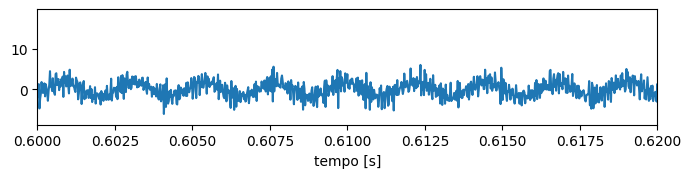

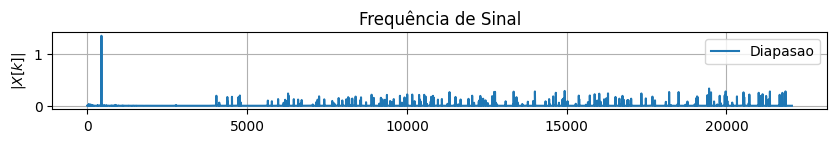

In [4]:
plt.figure(figsize=(8,1.5))
plt.plot(tempo, diapasao)
plt.xlabel("tempo [s]")
plt.xlim((0,max(tempo)))
plt.xlim((.6,.62));

### SEU CÓDIGO COMEÇA AQUI ### (função que plota a FFT do sinal)

# Variáveis para auxiliar nos cálculos do Diapasão.
x1 = diapasao
t1 = tempo

mag1, pha1, f1= serieFourier(x1, t1, Hz=True, dB=False, deg=False, Nfft=None)

# Abaixo são as plotagens dos gráficos. 
# Plotando a Magnitude do sinal.
plt.figure (figsize=(10, 1))
plt.plot (f1, mag1)
plt.title ("Frequência de Sinal")
plt.ylabel("$|X[k]|$")
plt.grid(1)
plt.xlim()
plt.legend(['Diapasao']);


### FIM DO CÓDIGO ###

ipd.Audio(diapasao, rate=fs, normalize=True)

### Flauta

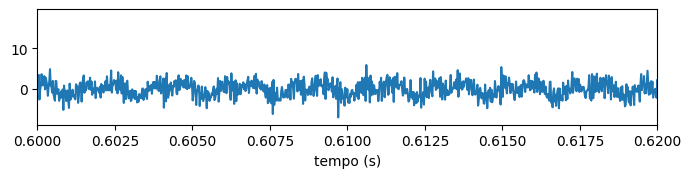

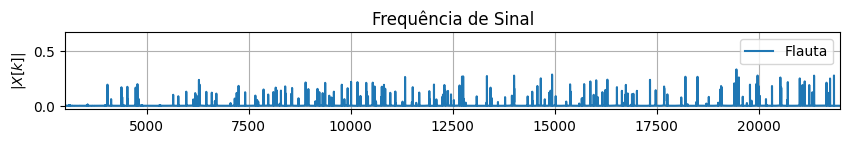

In [5]:
plt.figure(figsize=(8,1.5))
plt.plot(tempo, flauta)
plt.xlabel("tempo (s)")
plt.xlim((0,max(tempo)))
plt.xlim((.6,.62))

### SEU CÓDIGO COMEÇA AQUI ### (função que plota a FFT do sinal)

# Variáveis para auxiliar nos cálculos do Flauta.
x2 = flauta
t2 = tempo

mag2, pha2, f2= serieFourier(x2, t2, Hz=True, dB=False, deg=False, Nfft=None)

# Abaixo são as plotagens dos gráficos. 
# Plotando a Magnitude do sinal.
plt.figure (figsize=(10, 1))
plt.plot (f2, mag2)
plt.title ("Frequência de Sinal")
plt.ylabel("$|X[k]|$")
plt.grid(1)
plt.xlim(3000, 22000)
plt.legend(['Flauta']);

### FIM DO CÓDIGO ###

ipd.Audio(flauta, rate=fs, normalize=True)

### Violoncelo

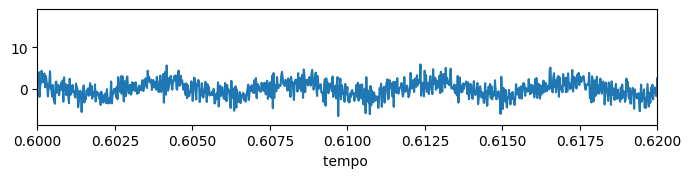

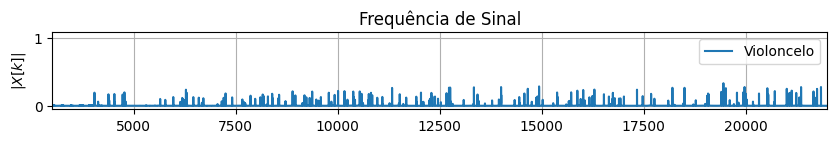

In [6]:
plt.figure(figsize=(8,1.5))
plt.plot(tempo, cello)
plt.xlabel("tempo ")
plt.xlim((0,max(tempo)))
plt.xlim((.6,.62))

### SEU CÓDIGO COMEÇA AQUI ### (função que plota a FFT do sinal)

# Variáveis para auxiliar nos cálculos do Violoncelo.
x3 = cello
t3 = tempo

mag3, pha3, f3= serieFourier(x3, t3, Hz=True, dB=False, deg=False, Nfft=None)

# Abaixo são as plotagens dos gráficos. 
# Plotando a Magnitude do sinal.
plt.figure (figsize=(10, 1))
plt.plot (f3, mag3)
plt.title ("Frequência de Sinal")
plt.ylabel("$|X[k]|$")
plt.grid(1)
plt.xlim(3000, 22000)
plt.legend(['Violoncelo']);

### FIM DO CÓDIGO ###

ipd.Audio(cello, rate=fs, normalize=True)

**Saída esperada**:
1. Em cada trecho de código, espera-se o player do audio, o sinal no domínio do tempo e o sinal do domínio da frequência.
---

## Projeto de filtro FIR

Os sinais de áudio estão contaminados com ruído. Sabe-se que os conteúdos espectrais acima de 2,5 kHz podem ser filtrados, pois tratam-se de ruídos.

<mark> **Faça**</mark>: Projete um **filtro FIR** para eliminar ruídos e use o filtro nos sinais.

**ATENÇÃO**: se você chegou até aqui na disciplina, provavelmente já compreendeu os principais passos para *projeto de um filtro* e seu uso. Neste exercício, você tem autonomia para decidir o filtro mais adequado, seus parâmetros de projeto e as melhores formas de apresentar suas características. Não será dada nenhuma instrução específica de como apresentar os resultados, quais gráficos são importantes de serem analisados e nem como apresentar os sinais. Apresente da melhor forma possível, este item fará parte da avaliação.

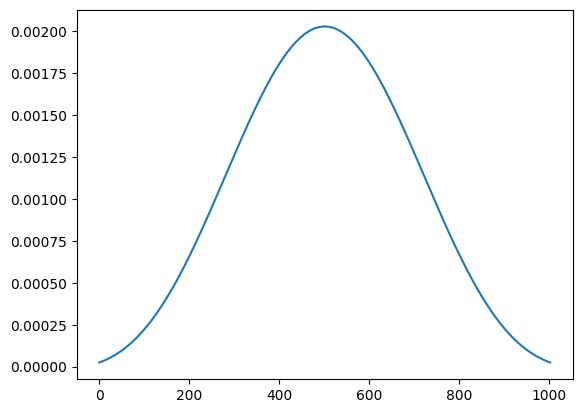

In [7]:
### SEU CÓDIGO COMEÇA AQUI ### 

# ESPECIFICAÇÕES DO FILTRO A SER UTILIZADO
Ap = .5 # dB
Ar = 65 # dB
wp = 850*np.pi# rad/s
wr = 1200*np.pi # rad/s
ws = fs*2*np.pi
T = 2*np.pi/ws # seg: período de amostragem
dp = 1 - 10**(-Ap/20)
dr = 10**(-Ar/20)

width = (wr-wp)/(ws/2) #Largura
ripple_db = 20*np.log10(min((dp, dr)))

#Projeta Filtro usando janela de Kaiser
numTaps, beta = signal.kaiserord(ripple=ripple_db, width= width)

wc = np.mean((wp, wr)) # Calcula frequencia de corte
width_rads = wr-wp # Largura da faixa de transição em rad/s
h = signal.firwin(numtaps=numTaps, cutoff = .1, window = ('kaiser', beta), fs=ws, pass_zero='lowpass')

num = h
den = np.hstack((np.ones(1), np.zeros(len(h)-1)))
sys = signal.dlti(num, den, dt=T)

plt.plot(h);

### FIM DO CÓDIGO ###

In [8]:
### SEU CÓDIGO COMEÇA AQUI ### 

#w= np.logspace(-1, 5, 1000)
#freqs, H_sys = signal.freqz(h, fs=fs)
#mag = np.abs(H_sys)
#pha = np.angle(H_sys) #Calcula a Fase. 

# Plotando a imagem da Magnitude do sinal Diapasão. 
#plt.figure(figsize=(8, 1.5))
#plt.semilogx(freqs, mag)
#plt.title("Sinal de Magnitude do Diapasão")
#plt.ylabel("Magnitude")
#plt.xlabel("frequencia [Hz]")
#plt.xlim()
#plt.grid(1)

# Plotando a imagem de FASE do Diapasão. 
#plt.figure(figsize=(8, 1.5))
#plt.semilogx(freqs, np.unwrap(pha))
#plt.title("Sinal de Fase do Diapasão")
#plt.ylabel("Fase")
#plt.xlabel("frequencia [Hz]")
#plt.xlim()
#plt.grid(1)

### CÓDIGOS ACIMA FORAM FEITOS EM SALA ###

### FIM DO CÓDIGO ###

(0.2, 0.25)

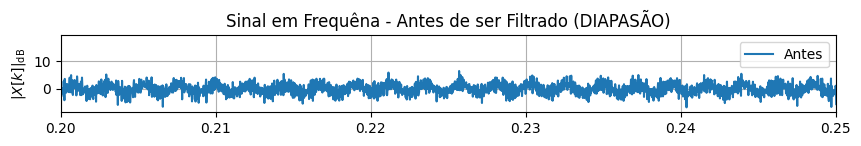

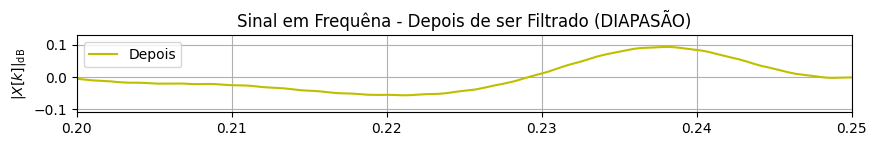

In [9]:
# Função para filtragem de uma sequência de dados usando um filtro digital. 
filtroDiapasao = signal.lfilter(b=h,a=1, x=diapasao)

# Plotando a Freqência do sinal antes da aplicação do filtro. 
plt.figure(figsize=(10,1))
plt.title("Sinal em Frequêna - Antes de ser Filtrado (DIAPASÃO)")
plt.plot(tempo, diapasao)
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Antes'])
plt.xlim(0.2, 0.25)

plt.figure(figsize=(10,1))
plt.plot(tempo,filtroDiapasao, "y")
plt.title("Sinal em Frequêna - Depois de ser Filtrado (DIAPASÃO)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Depois'])
plt.xlim(0.2, 0.25)

(0.2, 0.25)

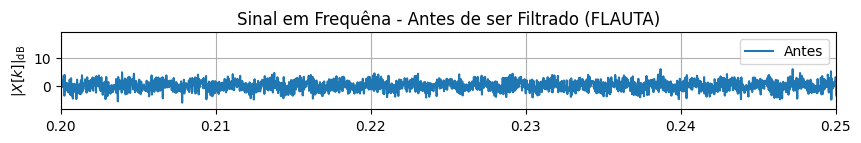

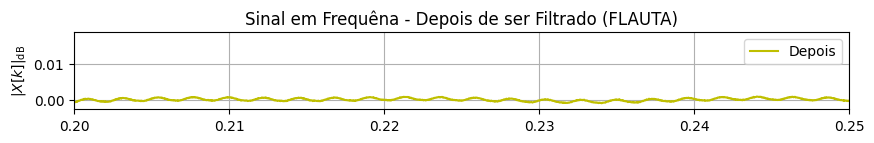

In [10]:
### SEU CÓDIGO COMEÇA AQUI ### 
# Função para filtragem de uma sequência de dados usando um filtro digital. 
filtroFlauta = signal.lfilter(b=h,a=1, x=flauta)

# Plotando a Freqência do sinal antes da aplicação do filtro. 
plt.figure(figsize=(10,1))
plt.title("Sinal em Frequêna - Antes de ser Filtrado (FLAUTA)")
plt.plot(tempo, flauta)
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Antes'])
plt.xlim(0.2, 0.25)

plt.figure(figsize=(10,1))
plt.plot(tempo,filtroFlauta, "y")
plt.title("Sinal em Frequêna - Depois de ser Filtrado (FLAUTA)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Depois'])
plt.xlim(0.2, 0.25)

### FIM DO CÓDIGO ###

(0.2, 0.25)

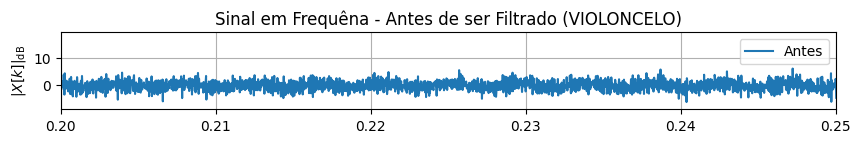

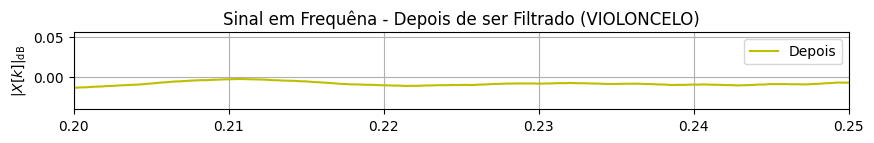

In [11]:
### SEU CÓDIGO COMEÇA AQUI ### 
# Função para filtragem de uma sequência de dados usando um filtro digital. 
filtroCello = signal.lfilter(b=h,a=1, x=cello)

# Plotando a Freqência do sinal antes da aplicação do filtro. 
plt.figure(figsize=(10,1))
plt.title("Sinal em Frequêna - Antes de ser Filtrado (VIOLONCELO)")
plt.plot(tempo, cello)
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Antes'])
plt.xlim(0.2, 0.25)

plt.figure(figsize=(10,1))
plt.plot(tempo,filtroCello, "y")
plt.title("Sinal em Frequêna - Depois de ser Filtrado (VIOLONCELO)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Depois'])
plt.xlim(0.2, 0.25)

### FIM DO CÓDIGO ###

In [12]:
### SEU CÓDIGO COMEÇA AQUI ### 

### FIM DO CÓDIGO ###

___
## Projeto de filtro IIR

Agora, projete um filtro IIR, usando a função `signal.iirdesign`, para realizar a mesma tarefa anterior: filtrar ruídos.

<mark> **Faça**</mark>: Projete um **filtro IIR** usando a função `signal.iirdesign` para eliminar ruídos e use o filtro nos sinais.

In [13]:
### SEU CÓDIGO COMEÇA AQUI ### 
# Variáveis para atenuar a banda de rejeição dos Sinais: Cello, Diapasão e Flauta. 
Ap= 0.6
Ar= 55 
fp = 1000
fr = 1200
# Valor de FS dado pelo exercício.
fs= 44100 

# Variável para a utiização do Filtro IRR nos sinais Cello, Diapasão e Flauta.
h2, aux = signal.iirdesign(wp, ws=wr, gpass=Ap, gstop=Ar, analog=False, ftype='ellip', output='ba', fs=fs)


### FIM DO CÓDIGO ###

(0.2, 0.25)

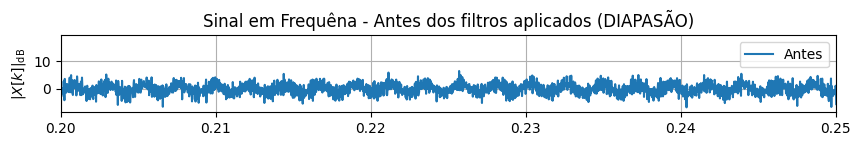

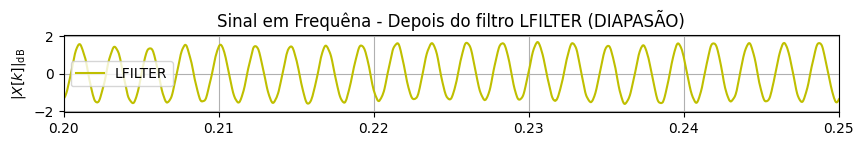

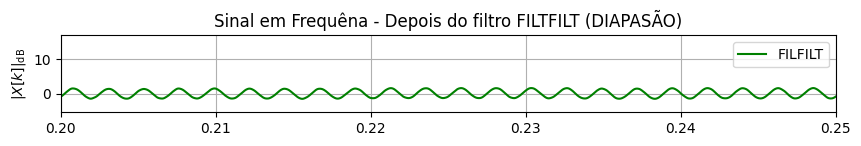

In [14]:
### SEU CÓDIGO COMEÇA AQUI ### 

# Função para filtragem de uma sequência de dados usando um filtro digital. 
filtroDiapIILF = signal.lfilter(h2, aux, diapasao)
filtroDiapIIFF = signal.filtfilt(h2, aux, diapasao)

# Plotando a Freqência do sinal antes da aplicação do filtro. 
plt.figure(figsize=(10,1))
plt.title("Sinal em Frequêna - Antes dos filtros aplicados (DIAPASÃO)")
plt.plot(tempo, diapasao)
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Antes'])
plt.xlim(0.2, 0.25)

# Plotando o Gráfico usando o LFILTER
plt.figure(figsize=(10,1))
plt.plot(tempo,filtroDiapIILF, "y")
plt.title("Sinal em Frequêna - Depois do filtro LFILTER (DIAPASÃO)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['LFILTER'])
plt.xlim(0.2, 0.25)

# Plotando o Gráfico usando o FILTFILT
plt.figure(figsize=(10,1))
plt.plot(tempo,filtroDiapIIFF, "g")
plt.title("Sinal em Frequêna - Depois do filtro FILTFILT (DIAPASÃO)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['FILFILT'])
plt.xlim(0.2, 0.25)


### FIM DO CÓDIGO ###

(0.2, 0.25)

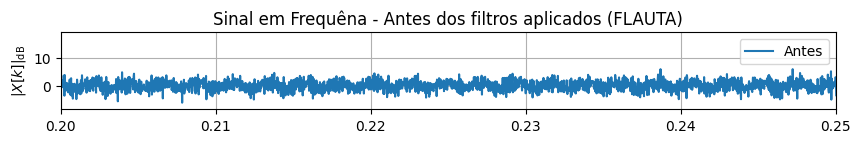

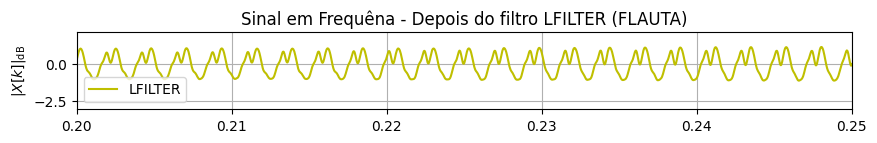

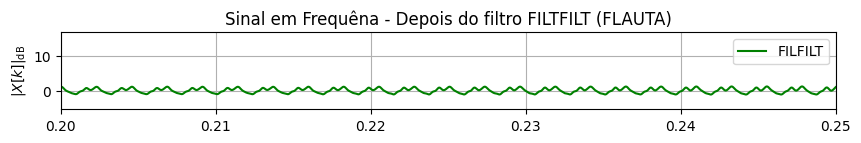

In [15]:
### SEU CÓDIGO COMEÇA AQUI ### 


# Função para filtragem de uma sequência de dados usando um filtro digital. 
filtroFlautaIILF = signal.lfilter(h2, aux, flauta)
filtroFlautaIIFF = signal.filtfilt(h2, aux, flauta)

# Plotando a Freqência do sinal antes da aplicação do filtro. 
plt.figure(figsize=(10,1))
plt.title("Sinal em Frequêna - Antes dos filtros aplicados (FLAUTA)")
plt.plot(tempo, flauta)
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Antes'])
plt.xlim(0.2, 0.25)

# Plotando o Gráfico usando o LFILTER
plt.figure(figsize=(10,1))
plt.plot(tempo,filtroFlautaIILF, "y")
plt.title("Sinal em Frequêna - Depois do filtro LFILTER (FLAUTA)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['LFILTER'])
plt.xlim(0.2, 0.25)

# Plotando o Gráfico usando o FILTFILT
plt.figure(figsize=(10,1))
plt.plot(tempo,filtroFlautaIIFF, "g")
plt.title("Sinal em Frequêna - Depois do filtro FILTFILT (FLAUTA)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['FILFILT'])
plt.xlim(0.2, 0.25)


### FIM DO CÓDIGO ###

(0.2, 0.25)

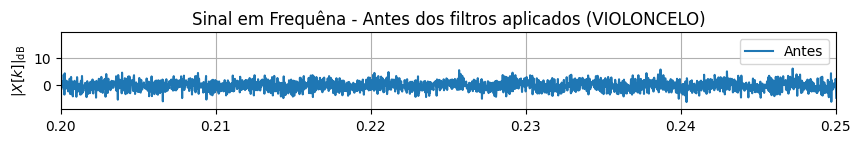

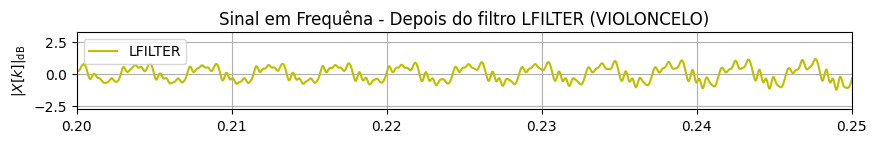

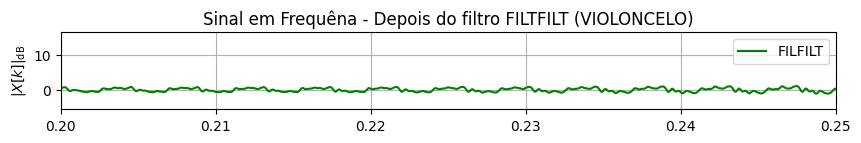

In [16]:
### SEU CÓDIGO COMEÇA AQUI ### 


# Função para filtragem de uma sequência de dados usando um filtro digital. 
filtroCelloIILF = signal.lfilter(h2, aux, cello)
filtroCelloIIFF = signal.filtfilt(h2, aux, cello)

# Plotando a Freqência do sinal antes da aplicação do filtro. 
plt.figure(figsize=(10,1))
plt.title("Sinal em Frequêna - Antes dos filtros aplicados (VIOLONCELO)")
plt.plot(tempo, cello)
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['Antes'])
plt.xlim(0.2, 0.25)

# Plotando o Gráfico usando o LFILTER
plt.figure(figsize=(10,1))
plt.plot(tempo,filtroCelloIILF, "y")
plt.title("Sinal em Frequêna - Depois do filtro LFILTER (VIOLONCELO)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['LFILTER'])
plt.xlim(0.2, 0.25)

# Plotando o Gráfico usando o FILTFILT
plt.figure(figsize=(10,1))
plt.plot(tempo,filtroCelloIIFF, "g")
plt.title("Sinal em Frequêna - Depois do filtro FILTFILT (VIOLONCELO)")
plt.ylabel("$|X[k]|_{\mathrm{dB}}$")
plt.grid(1)
plt.legend(['FILFILT'])
plt.xlim(0.2, 0.25)


### FIM DO CÓDIGO ###

In [17]:
### SEU CÓDIGO COMEÇA AQUI ### 



### FIM DO CÓDIGO ###

___
## Sinais produzidos pelo filtro FIR vs IIR

<mark> **Faça**</mark>: Usando a função `signal.lfilter`, filtre e compare os sinais produzidos pelo filtro FIR e pelo filtro IIR.

***Como devo comparar?*** A decisão de como comparar os sinais também faz parte da avaliação. Lembre-se das principais diferenças construtivas entre filtros FIR e filtros IIR para determinar qual a melhor forma (gráfica) para ressaltar a diferença entre os sinais produzidos.

(0.2, 0.25)

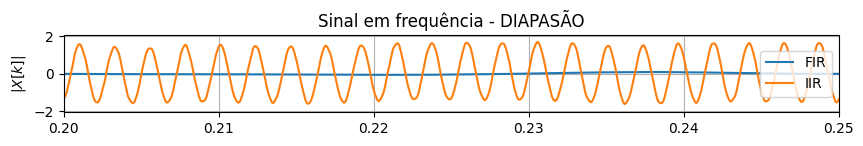

In [18]:
### SEU CÓDIGO COMEÇA AQUI ### 
# Código referente ao DIAPASÃO. Serão comparados os dois filtros no mesmo plot para um melhor entendimento. 

plt.figure(figsize=(10,1))
plt.title("Sinal em frequência - DIAPASÃO")
plt.plot(tempo, filtroDiapasao)
plt.plot( tempo, filtroDiapIILF)
plt.ylabel("$|X[k]|$")
plt.grid(1)
plt.legend(['FIR','IIR'])
plt.xlim(0.2,0.25)

### FIM DO CÓDIGO ###

(0.2, 0.25)

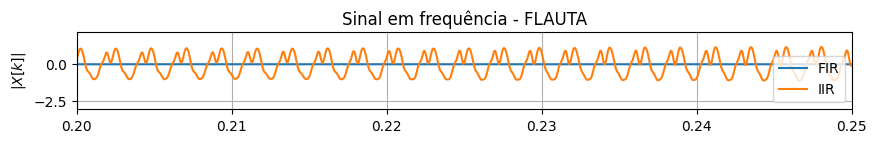

In [19]:
### SEU CÓDIGO COMEÇA AQUI ### 
# Código referente ao FLAUTA. Serão comparados os dois filtros no mesmo plot para um melhor entendimento.

plt.figure(figsize=(10,1))
plt.title("Sinal em frequência - FLAUTA")
plt.plot(tempo, filtroFlauta)
plt.plot( tempo, filtroFlautaIILF)
plt.ylabel("$|X[k]|$")
plt.grid(1)
plt.legend(['FIR','IIR'])
plt.xlim(0.2,0.25)

### FIM DO CÓDIGO ###

(0.2, 0.25)

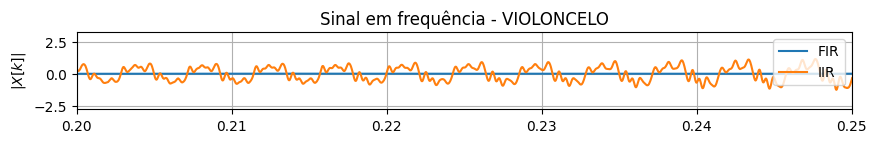

In [20]:
### SEU CÓDIGO COMEÇA AQUI ### 
# Código referente ao VIOLONCELO. Serão comparados os dois filtros no mesmo plot para um melhor entendimento. 

plt.figure(figsize=(10,1))
plt.title("Sinal em frequência - VIOLONCELO")
plt.plot(tempo, filtroCello)
plt.plot( tempo, filtroCelloIILF)
plt.ylabel("$|X[k]|$")
plt.grid(1)
plt.legend(['FIR','IIR'])
plt.xlim(0.2,0.25)

### FIM DO CÓDIGO ###

___

# Concluões

**1 - Quais as principais diferenças entre o atraso de grupo dos filtros FIR e IIR? Justifique mencionando explicitamente um gráfico produzido.**

**Resposta:**

`Os filtros FIR e IIR são considerados "filtros digitais", em que o FIR possui apenas a saída Y[n] e o IRR possui alterações em sua saída 'n', em que Y[n-x] proporciona um atraso na exibição das oscilações dos sinais representados acima. `

**2 - Qual filtro teve maior ordem, FIR ou IIR?**

**Resposta:**

` O filtro FIR possui uma maior ordem justamente por não apresentar esse pequeno atraso em suas representações. Mesmo que utilizado o plt.xlim, percebe-se que o atraso em IIR é bem pequeno. Ainda sim torna o filtro em FIR um filtro de maior ordem. `

______________

# Desafio (opcional)

1. Compare a distorção na forma de onda provocada pelo filtro IIR em comparação com o filtro FIR.
1. Compare a aplicação da função "lfilter" com a função "filtfilt" e explique a diferença entre elas.
1. Faça projeto de um filtro Bessel e mostre suas principais características em comparação com os demais.
1. Compare a FFT de um sinal com a FFT do sinal "janelado", usando diferentes janelas. Quais efeitos observados?